# 특성 추출을 사용한 차원 축소

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

digits = datasets.load_digits()

features = StandardScaler().fit_transform(digits.data)

pca = PCA(n_components = 0.99, whiten = True)

features_pca = pca.fit_transform(features)

print('원본 특성 개수:', features.shape[1])
print('줄어든 특성 개수:', features_pca.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 54


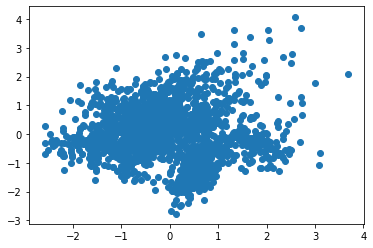

In [3]:
import matplotlib.pyplot as plt

plt.scatter(features_pca[:,0],features_pca[:,1])
plt.show()

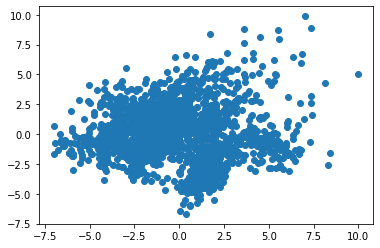

In [5]:
pca_nowhiten = PCA(n_components = 0.99)
features_nowhiten = pca_nowhiten.fit_transform(features)
plt.scatter(features_nowhiten[:,0],features_nowhiten[:,1])
plt.show()

In [7]:
pca_nowhiten.components_.shape

(54, 64)

In [9]:
import numpy as np

np.allclose(features_nowhiten, np.dot(features,pca_nowhiten.components_.T))

True

### 선형적으로 구분되지 않은 데이터의 차원 축소하기

In [11]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles

features, _ = make_circles(n_samples = 1000, random_state = 1, noise = 0.1, factor = 0.1)

kpca = KernelPCA(kernel = 'rbf', gamma = 15, n_components = 1)
features_kpca = kpca.fit_transform(features)

print('원본 특성의 개수:',features.shape[1])
print('줄어든 특성 개수:',features_kpca.shape[1])

원본 특성의 개수: 2
줄어든 특성 개수: 1


### 클래스 분리를 최대화하여 특성 줄이기

In [13]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()
features = iris.data
target = iris.target

lda = LinearDiscriminantAnalysis(n_components = 1)

features_lda = lda.fit(features,target).transform(features)

print('원본 특성 개수:',features.shape[1])
print('줄어든 특성 개수:',features_lda.shape[1])

원본 특성 개수: 4
줄어든 특성 개수: 1


In [14]:
lda = LinearDiscriminantAnalysis(n_components = None)
features_lda = lda.fit(features,target)

lda_var_ratios = lda.explained_variance_ratio_

def select_n_components(var_ratio,goal_var:float) -> int:
    
    total_variance = 0.0
    
    n_components = 0
    
    for explained_variance in var_ratio:
        total_variance += explained_variance
        n_components += 1
        if total_variance >= goal_var:
            break
            
    return n_components

select_n_components(lda_var_ratios,0.95)

1

### 행렬 분해를 사용하여 특성 줄이기

In [17]:
from sklearn.decomposition import NMF
from sklearn import datasets

digits = datasets.load_digits()

features = digits.data

nmf = NMF(n_components = 10, random_state = 1)
features_nmf = nmf.fit_transform(features)

print('원본 특성 개수:', features.shape[1])
print('줄어든 특성 개수:', features_nmf.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 10


C:\Users\jlee0\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


### 희소한 데이터의 특성 줄이기

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np

digits = datasets.load_digits()

features = StandardScaler().fit_transform(digits.data)

features_sparse = csr_matrix(features)

tsvd = TruncatedSVD(n_components = 10)

features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse)

print('원본 특성 개수:',features_sparse.shape[1])
print('줄어든 특성 개수:',features_sparse_tsvd.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 10


In [19]:
tsvd.explained_variance_ratio_[0:3].sum()

0.30039385343567626

In [23]:
tsvd = TruncatedSVD(n_components = features_sparse.shape[1] -1)
features_tsvd = tsvd.fit(features)

tsvd_var_ratios = tsvd.explained_variance_ratio_

def select_n_components(var_ratio, goal_var):
    total_variance = 0.0
    n_components =0
    for explained_variance in var_ratio:
        total_variance += explained_variance
        
        n_components += 1
        
        if total_variance >= goal_var:
            break
            
    return n_components

select_n_components(tsvd_var_ratios, 0.95)

40